# Week 7: Probabilistic ML
## Machine Learning - Lecture 2

**Author:** Shaahid Ahmed Nadeem 

---

# 🎲 Probability for Machine Learning: A Deep Dive

## What is Probability?

Probability is the mathematical framework for reasoning under **uncertainty**. It answers the fundamental question: *"How likely is an event to occur?"*

In machine learning, we constantly deal with uncertainty:
- Will this email be spam or not?
- What's the probability a patient has a disease given their symptoms?
- How confident are we that this image contains a cat?

Probability gives us the tools to make informed decisions despite this uncertainty.

---

## The Foundation: Basic Probability

The probability of an event A is defined as:

$$
P(A) = \frac{\text{number of ways } A \text{ can happen}}{\text{total number of possible outcomes}}
$$

### Key Properties:
1. **Range**: $0 \leq P(A) \leq 1$
   - $P(A) = 0$ means the event is **impossible**
   - $P(A) = 1$ means the event is **certain**
   - $P(A) = 0.5$ means the event has a 50-50 chance

2. **Complement**: $P(\text{not } A) = 1 - P(A)$

3. **Sum Rule**: All possible outcomes sum to 1
   $$P(A_1) + P(A_2) + ... + P(A_n) = 1$$

---

## Example 1: The Fair Coin

**Setup**: A fair coin has 2 equally likely outcomes
- Sample space: $\{H, T\}$
- Each outcome has probability: $\frac{1}{2} = 0.5$

**Question**: What's $P(\text{Heads})$?

$$
P(H) = \frac{1 \text{ way to get heads}}{2 \text{ total outcomes}} = \frac{1}{2} = 0.5
$$

---

## Example 2: The Binomial Distribution

Now let's ask a more interesting question: **What is the probability of getting exactly $k$ heads in $n$ coin tosses?**

This follows the **Binomial Distribution**, one of the most important distributions in ML.

### The Setup:
- We toss a coin **$n$ times** (number of trials)
- Each toss has probability **$p$** of heads (success probability)
- We want to know: What's the probability of getting **exactly $k$ heads**?

### The Formula:

$$
P(k \text{ heads in } n \text{ tosses}) = \binom{n}{k} \cdot p^k \cdot (1-p)^{n-k}
$$

Where:
- $\binom{n}{k} = \frac{n!}{k!(n-k)!}$ is the **binomial coefficient** (number of ways to choose $k$ successes from $n$ trials)
- $p^k$ is the probability of $k$ successes
- $(1-p)^{n-k}$ is the probability of $n-k$ failures

---

## Breaking Down the Formula

Let's understand each part with an example: **3 coin tosses, want exactly 2 heads**

### Part 1: The Binomial Coefficient $\binom{n}{k}$

**Question**: In how many ways can we get 2 heads in 3 tosses?

Possible sequences:
- HHT ✓
- HTH ✓
- THH ✓

That's 3 ways! This is exactly $\binom{3}{2}$:

$$
\binom{3}{2} = \frac{3!}{2! \cdot 1!} = \frac{6}{2 \cdot 1} = 3
$$

### Part 2: Probability of Each Sequence

For a fair coin ($p = 0.5$):
- Probability of HHT: $0.5 \times 0.5 \times 0.5 = 0.5^3 = 0.125$
- But wait! We want 2 heads and 1 tail specifically
- $P(\text{specific sequence with 2H, 1T}) = p^2 \cdot (1-p)^1 = 0.5^2 \times 0.5^1 = 0.125$

### Part 3: Combine Them

$$
P(\text{2 heads in 3 tosses}) = 3 \times 0.125 = 0.375
$$

---

## Real Examples with Numbers

### Example A: Fair Coin, 10 Tosses

**Parameters**: $n = 10$, $p = 0.5$

What's $P(\text{exactly 5 heads})$?

$$
P(5) = \binom{10}{5} \cdot 0.5^5 \cdot 0.5^5 = 252 \cdot 0.5^{10} = \frac{252}{1024} \approx 0.246
$$

**Insight**: With a fair coin and 10 tosses, getting exactly 5 heads happens about 25% of the time—the most likely outcome!

### Example B: Biased Coin, 10 Tosses

**Parameters**: $n = 10$, $p = 0.7$ (70% chance of heads)

What's $P(\text{exactly 7 heads})$?

$$
P(7) = \binom{10}{7} \cdot 0.7^7 \cdot 0.3^3 = 120 \cdot 0.0823543 \cdot 0.027 \approx 0.267
$$

**Insight**: With a biased coin, 7 heads becomes the most likely outcome (not 5!)

### Example C: Extreme Case

**Parameters**: $n = 10$, $p = 0.9$ (highly biased toward heads)

What's $P(\text{exactly 10 heads})$?

$$
P(10) = \binom{10}{10} \cdot 0.9^{10} \cdot 0.1^0 = 1 \cdot 0.3487 \cdot 1 \approx 0.349
$$

**Insight**: With such a biased coin, getting all heads happens 35% of the time!

---

In [4]:
import ipywidgets as widgets
from IPython.display import display, Markdown
import matplotlib.pyplot as plt
import math
import numpy as np

# Compute binomial probability mass function
def binomial_prob(n, k, p):
    return math.comb(n, k) * (p**k) * ((1-p)**(n-k))

# Create sliders
n_slider = widgets.IntSlider(value=10, min=1, max=30, step=1, description='Tosses (n)')
k_slider = widgets.IntSlider(value=5, min=0, max=30, step=1, description='Heads (k)')
p_slider = widgets.FloatSlider(value=0.5, min=0.05, max=0.95, step=0.01, description='P(head)')
output = widgets.Output()

# Update function with plot + text
def update(*args):
    with output:
        output.clear_output()
        n = n_slider.value
        k = k_slider.value
        p = p_slider.value
        
        # Binomial probability for selected k
        prob_k = binomial_prob(n, k, p)
        
        # Full distribution
        ks = np.arange(0, n+1)
        probs = [binomial_prob(n, i, p) for i in ks]
        
        # Plot
        plt.figure(figsize=(7,4))
        plt.bar(ks, probs, color='lightblue', edgecolor='black')
        plt.bar(k, prob_k, color='orange', edgecolor='black', label=f'P(X={k}) = {prob_k:.4f}')
        plt.xlabel('Number of Heads (k)')
        plt.ylabel('Probability')
        plt.title(f'Binomial Distribution (n={n}, p={p:.2f})')
        plt.legend()
        plt.grid(alpha=0.3)
        plt.show()
        
        # Markdown display
        display(Markdown(f"### 🔹 Probability of exactly **{k} heads** in **{n} tosses** (p={p:.2f}):"))
        display(Markdown(f"**P(X = {k}) = {prob_k:.4f}**"))
        
# Observe changes
n_slider.observe(update, 'value')
k_slider.observe(update, 'value')
p_slider.observe(update, 'value')

# Initial display
update()
display(n_slider, k_slider, p_slider, output)

IntSlider(value=10, description='Tosses (n)', max=30, min=1)

IntSlider(value=5, description='Heads (k)', max=30)

FloatSlider(value=0.5, description='P(head)', max=0.95, min=0.05, step=0.01)

Output()

# 🔀 Conditional Probability: A Deep Dive

## What is Conditional Probability?

Conditional probability answers: **"What's the probability of A happening, given that B has already happened?"**

It's written as $P(A|B)$ and read as **"probability of A given B"**

This is one of the **most important concepts** in machine learning because:
- We make predictions **given** observed data
- We reason about causes **given** effects
- We update beliefs **given** new information

---

## The Intuition

### Example: The Card Deck

Imagine a standard deck of 52 cards.

**Question 1**: What's the probability of drawing a King?

$$P(\text{King}) = \frac{4}{52} = \frac{1}{13} \approx 0.077$$

**Question 2**: You draw a card and see it's a **face card** (J, Q, K). NOW what's the probability it's a King?

This is conditional probability: $P(\text{King} | \text{Face card})$

**New universe**: Only 12 face cards exist (4 Jacks + 4 Queens + 4 Kings)

$$P(\text{King} | \text{Face card}) = \frac{4}{12} = \frac{1}{3} \approx 0.333$$

**Key insight**: Knowing it's a face card **changes** the probability from 7.7% to 33.3%!

---

## The Formula

The formal definition of conditional probability:

$$
P(A|B) = \frac{P(A \text{ and } B)}{P(B)}
$$

**In words**: 
- Numerator: Probability both A and B happen
- Denominator: Probability B happens
- Result: What fraction of times B happens does A also happen?

### Visual Interpretation

```
Total outcomes: ████████████████████ (100%)
B happens:      ████████░░░░░░░░░░░░ (40%)
A and B:        ████░░░░░░░░░░░░░░░░ (20%)

P(A|B) = 20% / 40% = 50%
```

When B happens (40% of the time), A also happens half of those times (20% out of 40% = 50%)

---

## Example 1: The Weather and Umbrella

### The Scenario

You notice your roommate carrying an umbrella. What's the probability it will rain today?

**Given information**:
- $P(\text{Rain}) = 0.3$ (30% of days have rain)
- $P(\text{Umbrella} | \text{Rain}) = 0.9$ (90% probability they take umbrella if it rains)
- $P(\text{Umbrella} | \text{No Rain}) = 0.2$ (20% probability they take umbrella if it doesn't rain)

**We want**: $P(\text{Rain} | \text{Umbrella})$

---

### Step 1: Find $P(\text{Umbrella})$

Using the **law of total probability**:

$$
P(\text{Umbrella}) = P(\text{Umbrella}|\text{Rain}) \cdot P(\text{Rain}) + P(\text{Umbrella}|\text{No Rain}) \cdot P(\text{No Rain})
$$

$$
= 0.9 \times 0.3 + 0.2 \times 0.7 = 0.27 + 0.14 = 0.41
$$

**Meaning**: Your roommate carries an umbrella 41% of days.

---

### Step 2: Find $P(\text{Rain and Umbrella})$

$$
P(\text{Rain and Umbrella}) = P(\text{Umbrella}|\text{Rain}) \cdot P(\text{Rain}) = 0.9 \times 0.3 = 0.27
$$

---

### Step 3: Apply Conditional Probability Formula

$$
P(\text{Rain}|\text{Umbrella}) = \frac{P(\text{Rain and Umbrella})}{P(\text{Umbrella})} = \frac{0.27}{0.41} \approx 0.659
$$

**Result**: Seeing the umbrella **increases** our belief in rain from 30% to 66%!

---

## Example 2: Medical Diagnosis (The Classic Problem)

### The Scenario

A rare disease affects 1% of the population. A test for this disease is 95% accurate.

You test **positive**. Should you panic?

**Given**:
- $P(\text{Disease}) = 0.01$ (1% base rate)
- $P(\text{Positive} | \text{Disease}) = 0.95$ (95% sensitivity - true positive rate)
- $P(\text{Negative} | \text{No Disease}) = 0.95$ (95% specificity - true negative rate)
- Therefore: $P(\text{Positive} | \text{No Disease}) = 0.05$ (5% false positive rate)

**We want**: $P(\text{Disease} | \text{Positive})$ - Do you actually have the disease?

---

### The Calculation

#### Step 1: Find $P(\text{Positive})$

$$
\begin{align}
P(\text{Positive}) &= P(\text{Positive}|\text{Disease}) \cdot P(\text{Disease}) \\
&\quad + P(\text{Positive}|\text{No Disease}) \cdot P(\text{No Disease}) \\
&= 0.95 \times 0.01 + 0.05 \times 0.99 \\
&= 0.0095 + 0.0495 \\
&= 0.059
\end{align}
$$

#### Step 2: Find $P(\text{Disease and Positive})$

$$
P(\text{Disease and Positive}) = P(\text{Positive}|\text{Disease}) \cdot P(\text{Disease}) = 0.95 \times 0.01 = 0.0095
$$

#### Step 3: Calculate

$$
P(\text{Disease}|\text{Positive}) = \frac{0.0095}{0.059} \approx 0.161
$$

**Shocking result**: Even with a positive test, you only have a **16% chance** of having the disease!

**Why?** The disease is so rare (1%) that most positive tests are false positives from the healthy 99%!

---

## The Chain Rule of Conditional Probability

We can chain conditions together:

$$
P(A \text{ and } B \text{ and } C) = P(A) \cdot P(B|A) \cdot P(C|A \text{ and } B)
$$

### Example: Drawing Cards Without Replacement

Draw 3 cards from a deck. What's the probability all are hearts?

$$
\begin{align}
P(\text{3 hearts}) &= P(H_1) \cdot P(H_2|H_1) \cdot P(H_3|H_1 \text{ and } H_2) \\
&= \frac{13}{52} \cdot \frac{12}{51} \cdot \frac{11}{50} \\
&= \frac{1}{4} \cdot \frac{12}{51} \cdot \frac{11}{50} \\
&\approx 0.0129 \text{ or } 1.29\%
\end{align}
$$

**Notice**: Each probability depends on what happened before!

---

## Independence vs Conditional Independence

### Independent Events

Events A and B are **independent** if:
$$P(A|B) = P(A)$$

**Meaning**: Knowing B doesn't change the probability of A

**Example**: Coin flips
- $P(\text{Heads on flip 2} | \text{Heads on flip 1}) = P(\text{Heads on flip 2}) = 0.5$
- The first flip doesn't affect the second

---

### Conditionally Independent Events

Events A and B are **conditionally independent given C** if:
$$P(A \text{ and } B | C) = P(A|C) \cdot P(B|C)$$

**This is the "naive" assumption in Naive Bayes!**

### Example: Email Words

Consider words "free" and "win":
- **NOT independent**: They often appear together in spam
  - $P(\text{free and win}) \neq P(\text{free}) \cdot P(\text{win})$

- **Conditionally independent given spam**: 
  - $P(\text{free and win}|\text{spam}) \approx P(\text{free}|\text{spam}) \cdot P(\text{win}|\text{spam})$
  - Given we know it's spam, seeing "free" doesn't tell us much new about "win"

---

## Real-World Scenarios

### Scenario 1: The Alarm

Your burglar alarm goes off. What's the probability there's actually a burglar?

**Given**:
- $P(\text{Burglar}) = 0.001$ (0.1% base rate)
- $P(\text{Alarm} | \text{Burglar}) = 0.99$ (99% detection)
- $P(\text{Alarm} | \text{No Burglar}) = 0.02$ (2% false alarm)

**Calculate** $P(\text{Burglar}|\text{Alarm})$:

$$
P(\text{Alarm}) = 0.99 \times 0.001 + 0.02 \times 0.999 = 0.02097
$$

$$
P(\text{Burglar}|\text{Alarm}) = \frac{0.99 \times 0.001}{0.02097} \approx 0.047
$$

**Result**: Only 4.7% chance it's a real burglar! Most alarms are false.

---

### Scenario 2: The Job Candidate

A candidate claims they have 10 years of Python experience.

**Given**:
- $P(\text{Experienced}) = 0.2$ (20% of candidates are truly experienced)
- $P(\text{Claims 10 years} | \text{Experienced}) = 0.9$ (90% of experienced devs claim it)
- $P(\text{Claims 10 years} | \text{Not Experienced}) = 0.3$ (30% of novices exaggerate)

**Calculate** $P(\text{Experienced} | \text{Claims 10 years})$:

$$
P(\text{Claims}) = 0.9 \times 0.2 + 0.3 \times 0.8 = 0.18 + 0.24 = 0.42
$$

$$
P(\text{Experienced}|\text{Claims}) = \frac{0.9 \times 0.2}{0.42} \approx 0.429
$$

**Result**: Only 43% of those who claim 10 years actually have it!

---

# 📑 Naive Bayes Algorithm: A Deep Dive

## What is Naive Bayes?

Naive Bayes is a **probabilistic classifier** that uses Bayes' Theorem to predict the class of new data. Despite its "naive" assumption (that features are independent), it's surprisingly powerful and widely used in:
- **Spam detection** 📧
- **Sentiment analysis** 😊😢
- **Document classification** 📄
- **Medical diagnosis** 🏥

The "naive" part? We assume features are **conditionally independent** given the class, which is often unrealistic but works amazingly well in practice!

---

## The Mathematics: Bayes' Theorem

### The Core Formula

Given some observed features (words in an email), we want to know: What's the probability it belongs to each class?

$$
P(\text{Class} | \text{Features}) = \frac{P(\text{Features} | \text{Class}) \cdot P(\text{Class})}{P(\text{Features})}
$$

**Breaking it down:**

| Term | Name | Meaning |
|------|------|---------|
| $P(\text{Class} \| \text{Features})$ | **Posterior** | What we want: probability of class given the features |
| $P(\text{Features} \| \text{Class})$ | **Likelihood** | How likely are these features if we know the class? |
| $P(\text{Class})$ | **Prior** | What's the base rate of this class? |
| $P(\text{Features})$ | **Evidence** | How common are these features overall? (often ignored for comparison) |

---

## Example: Email Spam Classification

### The Setup

You receive an email and need to determine: **Spam or Real?**

The email contains these words:
- "free" 🎁
- "win" 🏆
- "trusted" ✅

### Step 1: The Prior Probabilities

From your training data, you know:
- 40% of emails are spam: $P(\text{Spam}) = 0.4$
- 60% of emails are real: $P(\text{Real}) = 0.6$

**Insight**: Before even looking at the words, real emails are more common!

---

### Step 2: The Likelihood - Word Probabilities

From analyzing past emails, you learned these **conditional probabilities**:

#### For SPAM emails:
| Word | $P(\text{word} \| \text{Spam})$ | Meaning |
|------|------|---------|
| "free" | 0.80 | 80% of spam contains "free" |
| "win" | 0.70 | 70% of spam contains "win" |
| "trusted" | 0.20 | 20% of spam contains "trusted" |

#### For REAL emails:
| Word | $P(\text{word} \| \text{Real})$ | Meaning |
|------|------|---------|
| "free" | 0.10 | 10% of real emails contain "free" |
| "win" | 0.05 | 5% of real emails contain "win" |
| "trusted" | 0.80 | 80% of real emails contain "trusted" |

**Notice**: "free" and "win" are spam indicators, but "trusted" suggests a real email!

---

### Step 3: The "Naive" Assumption

**Naive Bayes assumes**: Words appear **independently** given the class

$$
P(\text{Words} | \text{Class}) = P(\text{word}_1 | \text{Class}) \times P(\text{word}_2 | \text{Class}) \times P(\text{word}_3 | \text{Class})
$$

**Is this realistic?** Not really! In reality:
- "free" and "win" often appear together in spam
- Words are correlated

**But it works!** The independence assumption simplifies computation and performs surprisingly well.

---

### Step 4: Calculate for SPAM

$$
\begin{align}
P(\text{Spam} | \text{free, win, trusted}) &\propto P(\text{free, win, trusted} | \text{Spam}) \times P(\text{Spam}) \\
&= P(\text{free}|\text{Spam}) \times P(\text{win}|\text{Spam}) \times P(\text{trusted}|\text{Spam}) \times P(\text{Spam}) \\
&= 0.80 \times 0.70 \times 0.20 \times 0.4 \\
&= 0.0448
\end{align}
$$

---

### Step 5: Calculate for REAL

$$
\begin{align}
P(\text{Real} | \text{free, win, trusted}) &\propto P(\text{free, win, trusted} | \text{Real}) \times P(\text{Real}) \\
&= P(\text{free}|\text{Real}) \times P(\text{win}|\text{Real}) \times P(\text{trusted}|\text{Real}) \times P(\text{Real}) \\
&= 0.10 \times 0.05 \times 0.80 \times 0.6 \\
&= 0.0024
\end{align}
$$

---

### Step 6: Compare and Decide

| Class | Unnormalized Probability | Normalized Probability |
|-------|-------------------------|------------------------|
| Spam | 0.0448 | $\frac{0.0448}{0.0448 + 0.0024} = 0.949$ = **94.9%** |
| Real | 0.0024 | $\frac{0.0024}{0.0448 + 0.0024} = 0.051$ = **5.1%** |

**Prediction**: 🚨 **SPAM** (94.9% confidence)

**Why?** Even though "trusted" suggests real, the strong spam signals from "free" and "win" dominate!

---

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
from IPython.display import display, Markdown

def naive_bayes_np_demo(free, win, trusted):
    # Features: 1 = word present, 0 = absent
    X = np.array([free, win, trusted])
    feature_names = np.array(["free", "win", "trusted"])
    
    # Priors for each class: [spam, real]
    prior = np.array([0.4, 0.6])
    
    # Likelihoods for each word given class
    # Rows → [Spam, Real]; Cols → [free, win, trusted]
    likelihood = np.array([
        [0.7, 0.8, 0.2],  # Spam
        [0.1, 0.1, 0.8]   # Real
    ])
    
    # Compute class likelihoods
    spam_lik = np.prod(likelihood[0]**X * (1-likelihood[0])**(1-X)) * prior[0]
    real_lik = np.prod(likelihood[1]**X * (1-likelihood[1])**(1-X)) * prior[1]
    
    # Determine class
    result = 'SPAM' if spam_lik > real_lik else 'REAL'
    color = 'orange' if result == 'SPAM' else 'green'
    
    # Visualization
    plt.figure(figsize=(6,4))
    plt.bar(['SPAM', 'REAL'], [spam_lik, real_lik], color=['orange', 'green'])
    plt.title('Naive Bayes Classification Likelihoods')
    plt.ylabel('Posterior Score (unnormalized)')
    plt.grid(axis='y', alpha=0.3)
    plt.show()
    
    # Markdown output
    active_words = [feature_names[i] for i, val in enumerate(X) if val == 1]
    display(Markdown(f"### 📨 Words present: {', '.join(active_words) if active_words else 'None'}"))
    display(Markdown(f"Spam score: **{spam_lik:.4f}**  |  Real score: **{real_lik:.4f}**"))
    display(Markdown(f"### Classified as: <span style='color:{color}; font-weight:bold'>{result}</span>"))

interact(naive_bayes_np_demo, free=(0,1), win=(0,1), trusted=(0,1));

interactive(children=(IntSlider(value=0, description='free', max=1), IntSlider(value=0, description='win', max…

# 🧠 Linear Regression

## 1. What is Linear Regression?

**Linear Regression** is one of the simplest and most fundamental machine learning algorithms used for predicting continuous numerical values based on input features. It establishes a linear relationship between input variables and a single output variable.

### Real-world Examples:
- **Real Estate**: Predicting house prices based on size, location, number of bedrooms
- **Business**: Estimating sales revenue based on advertising budget
- **Healthcare**: Forecasting patient recovery time based on treatment dosage
- **Meteorology**: Predicting temperature based on historical weather data

## 2. The Basic Idea

Imagine you have data points scattered on a graph. Linear regression finds the **best-fitting straight line** that minimizes the distance between the predicted values and actual data points.

### Model Equation:
```
y = w*x + b
```
**Where:**
- `y` = target variable (what we want to predict)
- `x` = input feature (what we use to make predictions)
- `w` = weight (slope of the line - indicates how much y changes for each unit change in x)
- `b` = bias (y-intercept - value of y when x is zero)

## 3. Finding the Best Line: The Cost Function

How do we determine if our line is "good enough"? We use the **Mean Squared Error (MSE)** to quantify how far our predictions are from the actual values.

### Cost Function Formula:
```
MSE = (1/N) * Σ(y_i - ŷ_i)²
```
**Where:**
- `N` = number of data points
- `y_i` = actual observed value
- `ŷ_i` = predicted value (ŷ_i = w*x_i + b)

**Our Goal:** Find the optimal values of `w` and `b` that minimize the MSE!

## 4. Method 1: Gradient Descent (Iterative Optimization)

### The Mountain Descent Analogy

Imagine you're standing on a foggy mountain with no map. Your goal is to **reach the lowest point** (the valley), but you can only feel the slope beneath your feet.

**The Process:**
1. **Feel the slope** around you (calculate gradient)
2. **Take a small step** downhill (update parameters)
3. **Repeat** until you can't go lower (convergence)

### Mathematical Foundation

We have our linear model and cost function:
```
ŷ = w*x + b
J(w,b) = (1/N) * Σ(y_i - ŷ_i)²
```

**Step 1: Compute Gradients (Feel the Slope)**

The gradient tells us the direction of steepest ascent. We need to go in the opposite direction!

```
∂J/∂w = (-2/N) * Σ x_i * (y_i - ŷ_i)
∂J/∂b = (-2/N) * Σ (y_i - ŷ_i)
```

**Step 2: Update Parameters (Take Steps Downhill)**

```
w_new = w - α * (∂J/∂w)
b_new = b - α * (∂J/∂b)
```

**Where:**
- `α` = learning rate (step size)
- Too large → overshoot the minimum
- Too small → slow convergence
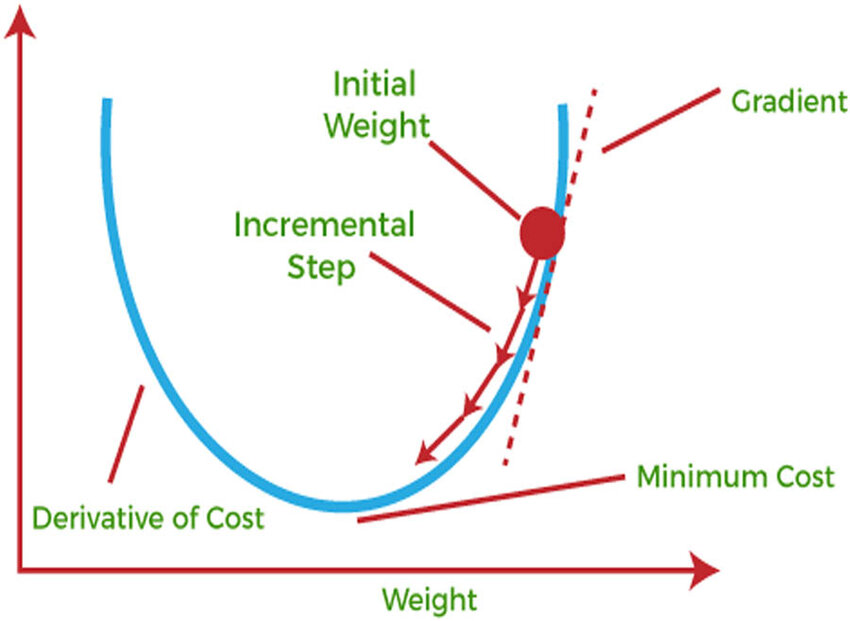

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, IntSlider
from IPython.display import display, Markdown, clear_output

# Sample data (house size vs price)
X = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 6, 8, 10])

def linear_regression_viz(learning_rate=0.01, epochs=100):
    # Initialize parameters
    w, b = 0, 0
    costs = []

    # Training with gradient descent
    for epoch in range(epochs):
        y_pred = w * X + b
        errors = y_pred - y
        dw = (2/len(X)) * np.sum(errors * X)
        db = (2/len(X)) * np.sum(errors)
        w -= learning_rate * dw
        b -= learning_rate * db
        cost = np.mean(errors**2)
        costs.append(cost)

    # Plot the fit and training progress
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))

    # --- Left: Regression line ---
    axs[0].scatter(X, y, color='blue', label='Data points')
    axs[0].plot(X, w * X + b, color='red', label=f'Fit: y = {w:.2f}x + {b:.2f}')
    axs[0].set_title("Linear Regression Fit", fontsize=14)
    axs[0].set_xlabel("House Size")
    axs[0].set_ylabel("Price")
    axs[0].legend()
    axs[0].grid(True, linestyle="--", alpha=0.6)

    # --- Right: Cost curve ---
    axs[1].plot(range(epochs), costs, color='purple')
    axs[1].set_title("Training Loss (MSE)", fontsize=14)
    axs[1].set_xlabel("Epoch")
    axs[1].set_ylabel("Cost")
    axs[1].grid(True, linestyle="--", alpha=0.6)

    plt.tight_layout()
    plt.show()

    display(Markdown(
        f"### Final Parameters\n"
        f"- **Weight (w):** {w:.4f}\n"
        f"- **Bias (b):** {b:.4f}\n"
        f"- **Final Cost:** {costs[-1]:.6f}\n\n"
        f"The model learns by adjusting **w** and **b** each step to reduce the Mean Squared Error (MSE).\n"
        f"A higher learning rate speeds learning but can overshoot; a smaller one is more stable but slower."
    ))

# Interactive sliders
interact(
    linear_regression_viz,
    learning_rate=FloatSlider(value=0.01, min=0.001, max=0.1, step=0.001, description='Learning Rate'),
    epochs=IntSlider(value=100, min=10, max=1000, step=10, description='Epochs')
);


interactive(children=(FloatSlider(value=0.01, description='Learning Rate', max=0.1, min=0.001, step=0.001), In…

**What's happening:**
- We start with random `w` and `b` (both 0)
- We calculate how "wrong" our predictions are
- We adjust `w` and `b` to be less wrong
- We repeat many times until we can't improve much more


## Method 2: Closed-Form Solution (Matrix Approach)

For those who appreciate mathematical elegance! We can derive exact formulas using linear algebra that work for both simple and multiple linear regression.


### Original Problem in Matrix Notation

Let's define our data matrices:

```
X = [1  x₁]    y = [y₁]
    [1  x₂]        [y₂]
    [...  ]        [...]
    [1  xₙ]        [yₙ]

θ = [b]
    [w]
```

The model becomes: **y = Xθ**

### Cost Function in Matrix Form

The Mean Squared Error becomes:
```
J(θ) = (1/N) * (y - Xθ)ᵀ(y - Xθ)
```

## Mathematical Derivation

### Step 1: Expand the Cost Function

```
J(θ) = (1/N) * [yᵀy - yᵀXθ - θᵀXᵀy + θᵀXᵀXθ]
```

Since yᵀXθ is a scalar, we have yᵀXθ = θᵀXᵀy, so:
```
J(θ) = (1/N) * [yᵀy - 2θᵀXᵀy + θᵀXᵀXθ]
```

### Step 2: Take the Gradient

We compute the derivative with respect to θ:

```
∇J(θ) = (1/N) * [-2Xᵀy + 2XᵀXθ]
∇J(θ) = (2/N) * [XᵀXθ - Xᵀy]
```

### Step 3: Set Gradient to Zero

To find the minimum:
```
XᵀXθ - Xᵀy = 0
XᵀXθ = Xᵀy
```

### Step 4: Solve for θ

**The Normal Equation:**
```
θ = (XᵀX)⁻¹Xᵀy
```

## Geometric Interpretation

The closed-form solution finds the projection of y onto the column space of X:

- **XᵀX** represents the covariance matrix of features
- **(XᵀX)⁻¹** normalizes by the feature variances
- **Xᵀy** represents the covariance between features and target

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
from IPython.display import display, Markdown

# Sample data (house size vs price)
X = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 6, 8, 10])

def linear_regression_closed_form(noise=0.0):
    """
    Visualizes linear regression solved using the closed-form (Normal Equation)
    """
    # Add noise to data for interactivity
    y_noisy = y + np.random.randn(len(y)) * noise
    
    # Convert X to matrix form (add bias term)
    X_b = np.c_[np.ones((len(X), 1)), X]  # [[1, x1], [1, x2], ...]
    
    # Closed-form solution: θ = (XᵀX)⁻¹ Xᵀy
    theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_noisy)
    b, w = theta_best[0], theta_best[1]
    
    # Predictions
    y_pred = w * X + b
    
    # Plot
    plt.figure(figsize=(8, 5))
    plt.scatter(X, y_noisy, color='blue', label='Data (with noise)')
    plt.plot(X, y_pred, color='red', linewidth=2, label=f'Best Fit: y = {w:.2f}x + {b:.2f}')
    plt.title("Linear Regression (Closed-Form Solution)", fontsize=14)
    plt.xlabel("House Size")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()
    

# Interactive slider to simulate noise
interact(
    linear_regression_closed_form,
    noise=FloatSlider(value=0.0, min=0.0, max=2.0, step=0.1, description='Noise Level')
);


interactive(children=(FloatSlider(value=0.0, description='Noise Level', max=2.0), Output()), _dom_classes=('wi…

# Practice Problems
1. https://www.deep-ml.com/problems/168 (Probability)
2. https://www.deep-ml.com/problems/180 (Probability)
3. https://www.deep-ml.com/problems/79 (Probability)
5. https://www.deep-ml.com/problems/14 (Linear Regression)
6. https://www.deep-ml.com/problems/15 (Linear Regression)